# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.76G/1.76G [00:59<00:00, 32.2MB/s]
100% 1.76G/1.76G [00:59<00:00, 31.8MB/s]


In [ ]:
!ls

kaggle.json  lung-and-colon-cancer-histopathological-images.zip  sample_data


In [ ]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
import os
import pickle
import csv

In [ ]:
main_path = "./lung_colon_image_set/"
#main_path='/content/drive/MyDrive/lung_colon_image_set/'
folder_names = []
#for entry_name in os.listdir('/content/lung_colon_image_set/lung_image_sets/'):
    #print(entry_name)
#    entry_path = os.path.join('/content/lung_colon_image_set/lung_image_sets/', entry_name)
#    if os.path.isdir(entry_path):
       # print(entry_path)
#        folder_names.append(entry_name)

for entry_name in os.listdir('./lung_colon_image_set/colon_image_sets/'):
    #print(entry_name)
    entry_path = os.path.join('./lung_colon_image_set/colon_image_sets/', entry_name)
    if os.path.isdir(entry_path):
       # print(entry_path)
        folder_names.append(entry_name)
        
print('The Categories are',folder_names)
DIR = './lung_colon_image_set/lung_image_sets/lung_aca/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

The Categories are ['colon_aca', 'colon_n']
5000


In [ ]:
DIR = './lung_colon_image_set/lung_image_sets/lung_n/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

5000


In [ ]:
images = []
labels = []
limit=600
limit2=600
img_size=256

main_path1='./lung_colon_image_set/lung_image_sets/'
#main_path2='/content/lung_colon_image_set/colon_image_sets/'
folder_names = []
for entry_name in os.listdir('./lung_colon_image_set/lung_image_sets/'):
    print(entry_name)
    entry_path = os.path.join('./lung_colon_image_set/lung_image_sets/', entry_name)
    if os.path.isdir(entry_path):
        print(entry_path)
        folder_names.append(entry_name)
        
#for entry_name in os.listdir('/content/lung_colon_image_set/colon_image_sets/'):
    #print(entry_name)
#    entry_path = os.path.join('/content/lung_colon_image_set/colon_image_sets/', entry_name)
#    if os.path.isdir(entry_path):
       # print(entry_path)
#        folder_names.append(entry_name)      
        
print('The Categories are',folder_names)

j=0
for folder in folder_names:
    for filename in os.listdir(os.path.join(main_path1,folder)):
        img_path = os.path.join(main_path1,folder)
        img = cv2.imread(os.path.join(img_path,filename)) 
        if img is not None:
            img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
            img = cv2.resize(img,(img_size, img_size))
            images.append(img)
            if folder == 'lung_n':
                labels.append(0)
                #print('normal')
            elif folder == 'lung_aca':
                labels.append(1)
                #print('ACA')
            elif folder == 'lung_scc':
                labels.append(2)
                #print('SCC')
        j=j+1
        if j >= limit2:
            j=0
            break
            
#for folder in folder_names:
#    for filename in os.listdir(os.path.join(main_path2,folder)):
#        img_path = os.path.join(main_path2,folder)
#        img = cv2.imread(os.path.join(img_path,filename)) 
#        if img is not None:
#            img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   
#            img = cv2.resize(img,(img_size, img_size))
#            images.append(img)
#            if folder == 'colon_aca':
#                labels.append(1)
                #print('aca')
#            elif folder == 'colon_n':
#               labels.append(0)
                #print('normal')
#        j=j+1
#        if j >= limit:
#            j=0
#            break
                        
images,labels=np.array(images),np.array(labels)
print(images.shape)
#print(labels)

lung_n
./lung_colon_image_set/lung_image_sets/lung_n
lung_scc
./lung_colon_image_set/lung_image_sets/lung_scc
lung_aca
./lung_colon_image_set/lung_image_sets/lung_aca
The Categories are ['lung_n', 'lung_scc', 'lung_aca']
(1800, 256, 256)


In [ ]:
print(labels.shape)

(1800,)


In [ ]:
#Obtaining Variance of images
kernel = np.ones((3,3),np.uint8)
#print(kernel)
var_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    var_vector[i] = np.var(x)
    i=i+1
print(var_vector[6])

#Obtaining Mean of images
mean_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    mean_vector[i] = np.mean(x)
    i=i+1
print(mean_vector[6])

#Obtaining Standard Deviation of images
std_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    std_vector[i] = np.std(x)
    i=i+1
print(std_vector[6])

skew_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    skew_vector[i] = stats.skew(x)
    i=i+1
print(skew_vector[6])

#Obtaining Kurtosis of images
kurto_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    kurto_vector[i] = stats.kurtosis(x)
    i=i+1
print(kurto_vector[6])
#Obtaining Entropy of images
entropy_vector = np.empty((limit*3,1))
i = 0
for image in images:
    x, bins = np.histogram(image,bins=255, density=False)
    entropy_vector[i] = stats.entropy(x)
    i=i+1
print(entropy_vector[6])
print(np.shape(entropy_vector))

#Applying Canny edge detection
canny_vector = np.empty((limit*3,img_size*img_size))
i = 0
for image in images:
    canny = cv2.Canny(image,40,200)
    canny_vector[i] = np.array(canny.flatten())
    i=i+1
print(np.shape(canny_vector))


#Applying Sobel X
sobelX_vector = np.empty((limit*3,img_size*img_size))
i = 0
for image in images:
    sobelX = cv2.Sobel(image,cv2.CV_8UC1,1,0,ksize=5)
    sobelX_vector[i] = np.array(sobelX.flatten())
    i=i+1
#Applying Sobel Y
sobelY_vector = np.empty((limit*3,img_size*img_size))
i = 0
for image in images:
    sobelY = cv2.Sobel(image,cv2.CV_8UC1,0,1,ksize=5)
    sobelY_vector[i] = np.array(sobelY.flatten())
    i=i+1

[271617.93331795]
[257.00392157]
[521.16977399]
[3.4226515]
[11.83803827]
[4.40984413]
(1800, 1)
(1800, 65536)


In [ ]:
print(np.shape(sobelY_vector))
print(np.shape(sobelX_vector))

(1800, 65536)
(1800, 65536)


In [ ]:
feature_vector = np.empty((limit*3,0))
feature_vector=np.append(feature_vector,mean_vector,axis=1)
feature_vector=np.append(feature_vector,var_vector,axis=1)
feature_vector=np.append(feature_vector,std_vector,axis=1)
feature_vector=np.append(feature_vector,skew_vector,axis=1)
feature_vector=np.append(feature_vector,kurto_vector,axis=1)
feature_vector=np.append(feature_vector,entropy_vector,axis=1)
feature_vector=np.append(feature_vector,canny_vector,axis=1)
feature_vector=np.append(feature_vector,sobelX_vector,axis=1)
feature_vector=np.append(feature_vector,sobelY_vector,axis=1)
#feature_vector=np.append(feature_vector,hog_features,axis=1)
print(np.shape(feature_vector))
#print(feature_vector[0])
#feature_vector=np.append(feature_vector,,axis=1)

(1800, 196614)


In [ ]:
print(labels.shape)

(1800,)


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(feature_vector,labels,test_size=0.2,shuffle=True)#80% training

from sklearn.model_selection import cross_val_score

print(xtrain.shape)

(1440, 196614)


# Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = RandomForestClassifier(n_estimators = 2000, criterion='entropy')



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


In [ ]:
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:
ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

In [ ]:
print(classification_report(ytest,ypredict2))

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
y_proba = clf.predict_proba(xtest)
import matplotlib.pyplot as plt  
from sklearn import metrics


In [ ]:
!pip install scikit-plot
import scikitplot as skplt
plot=skplt.metrics.plot_precision_recall(ytest, y_proba)

In [ ]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(ytest, y_proba)

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ytest,ypredict))

In [ ]:
from sklearn.metrics import average_precision_score
print(average_precision_score(ytest,ypredict))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

# XGBoost

Train Accuracy: 0.9909722222222223


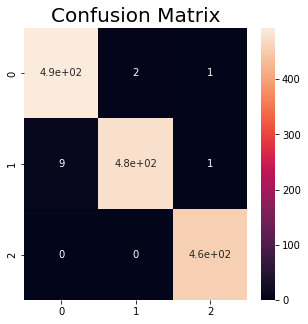

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost as xgb

xb = xgb.XGBClassifier( colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
#clf = RandomForestClassifier()
xb.fit(xtrain, ytrain)
ypredict = xb.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
ypredict2 = xb.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.7361111111111112


In [ ]:

print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       104
           1       0.64      0.70      0.67       112
           2       0.77      0.69      0.73       144

    accuracy                           0.74       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.74      0.74      0.74       360



# SVM

Train Accuracy: 0.9979166666666667


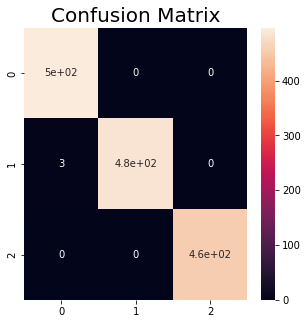

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

clf = svm.SVC(kernel = "poly", random_state=0, probability = True,decision_function_shape='ovo', degree=2)

#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
#print(classification_report(ytrain,ypredict))

Test Accuracy: 0.3


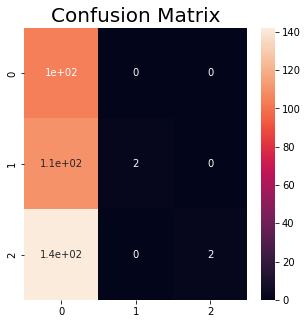

In [ ]:
ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45       104
           1       1.00      0.02      0.04       112
           2       1.00      0.01      0.03       144

    accuracy                           0.30       360
   macro avg       0.76      0.34      0.17       360
weighted avg       0.80      0.30      0.15       360



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifier = SVC()
param_grid = {'degree':[3,4,5,6],'C' : [1,2,3,4], 'kernel':['poly']}
grid = GridSearchCV(SVC(), param_grid, refit = True, return_train_score = True, cv =5) 
   
grid.fit(xtrain, ytrain) 
 

grid_predictions = grid.predict(X_test) 
   

print(f'The best parameters are {grid.best_params_}')
print(f'The best score is {grid.best_score_}')

df=pd.DataFrame(grid.cv_results_)
df2 =df.loc[:, ["params", "mean_test_score", "mean_train_score", "rank_test_score"] ]
print (df2)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import cross_val_score



from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
clf = svm.SVC(kernel = "linear")

#print(clf.score(xtest,ytest))

scores = cross_val_score(clf, xtrain, ytrain, cv=5)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)


# Decision Tree Classifier

> Indented block



In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = DecisionTreeClassifier(max_depth = 20, criterion='gini')



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 1.0


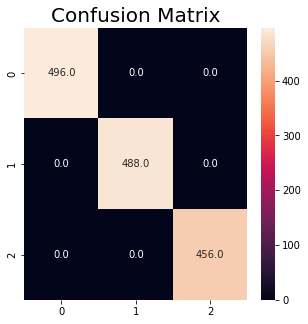

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       488
           2       1.00      1.00      1.00       456

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [ ]:

cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:

ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.625


In [ ]:
print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       104
           1       0.56      0.68      0.62       112
           2       0.71      0.50      0.59       144

    accuracy                           0.62       360
   macro avg       0.63      0.64      0.63       360
weighted avg       0.64      0.62      0.62       360



# Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = GaussianNB()



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 0.7368055555555556


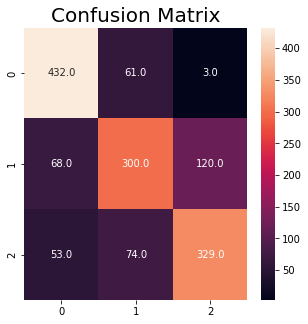

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       496
           1       0.69      0.61      0.65       488
           2       0.73      0.72      0.72       456

    accuracy                           0.74      1440
   macro avg       0.73      0.74      0.73      1440
weighted avg       0.73      0.74      0.73      1440



In [ ]:


cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:


ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.5722222222222222


In [ ]:

print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       104
           1       0.42      0.42      0.42       112
           2       0.66      0.55      0.60       144

    accuracy                           0.57       360
   macro avg       0.57      0.58      0.57       360
weighted avg       0.57      0.57      0.57       360



# KNN

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#parameters = {'C':[0.01, 0.1, 10]}
clf = KNeighborsClassifier(n_neighbors=3)



#scores = cross_val_score(clf, xtrain, ytrain, cv=5)
#print(scores)
#print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(xtrain, ytrain)
#ypredict2 = clf.predict(xtest)
#print(clf.score(xtest,ytest))

ypredict = clf.predict(xtrain)
print("Train Accuracy:",metrics.accuracy_score(ytrain, ypredict))

#print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))

#cm = confusion_matrix(ytest, ypredict2)


Train Accuracy: 0.3784722222222222


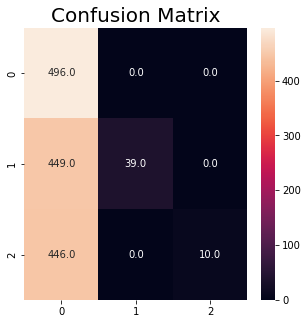

              precision    recall  f1-score   support

           0       0.36      1.00      0.53       496
           1       1.00      0.08      0.15       488
           2       1.00      0.02      0.04       456

    accuracy                           0.38      1440
   macro avg       0.79      0.37      0.24      1440
weighted avg       0.78      0.38      0.24      1440



In [ ]:
cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, fmt='.1f')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#print(classification_report(ytest,ypredict2))
print(classification_report(ytrain,ypredict))

In [ ]:



ypredict2 = clf.predict(xtest)
print("Test Accuracy:",metrics.accuracy_score(ytest, ypredict2))
cm = confusion_matrix(ytest, ypredict2)

Test Accuracy: 0.2916666666666667


In [ ]:

print(classification_report(ytest,ypredict2))

              precision    recall  f1-score   support

           0       0.29      1.00      0.45       104
           1       1.00      0.01      0.02       112
           2       0.00      0.00      0.00       144

    accuracy                           0.29       360
   macro avg       0.43      0.34      0.16       360
weighted avg       0.39      0.29      0.14       360



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score



from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
clf = svm.SVC()

clf.fit(xtrain, ytrain)
ypredict = clf.predict(xtrain)

cm = confusion_matrix(ytrain, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

print(classification_report(ytrain,ypredict))

In [ ]:
#print(clf.coef_.shape)
coef = clf.coef_.flatten()
print(coef[0])
print(coef[1])
print(coef[2])
print(coef[3])
print(coef[4])
print(coef[5])
print(np.mean(coef[5:65542]))
print(np.mean(coef[65542:131078]))
print(np.mean(coef[131078:196614]))


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(ytest,ypredict)
plt.plot(recall, precision, lw=2)
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
from sklearn.metrics import auc
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(ytest, ypredict)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

plt.plot(recall, precision)
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import learning_curve
#from sklearn.model_selection import validation_curve

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(), xtrain, ytrain, train_sizes=[0.1, 0.25, 0.5, 0.75, 1.0], cv=5)
#train_scores, valid_scores = validation_curve(clf, X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3), cv=5)

In [ ]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
kf = KFold(n_splits=5)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):
    
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()